## Importing libraries

In [71]:
# !pip install python-dotenv
import requests
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from dotenv import load_dotenv
import os
import zipfile
import shutil

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# Retrieving api key
load_dotenv("../key.env")
api_key = os.getenv("API_KEY")

## Reading datasets

In [5]:
#Running the get_bus_info function to make bus info related API calls
%run get_bus_info_function.ipynb

In [6]:
bus_services_df = get_bus_info("https://datamall2.mytransport.sg/ltaodataservice/BusServices", api_key)
bus_routes_df = get_bus_info("https://datamall2.mytransport.sg/ltaodataservice/BusRoutes", api_key)
bus_stops_df = get_bus_info("https://datamall2.mytransport.sg/ltaodataservice/BusStops", api_key)

In [69]:
bus_stop_example = bus_stops_df['BusStopCode'][0]
bus_arrival_df = get_bus_arrival("https://datamall2.mytransport.sg/ltaodataservice/v3/BusArrival", api_key, bus_stop_example)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ServiceNo                  11 non-null     object
 1   Operator                   11 non-null     object
 2   NextBus.OriginCode         11 non-null     object
 3   NextBus.DestinationCode    11 non-null     object
 4   NextBus.EstimatedArrival   11 non-null     object
 5   NextBus.Monitored          11 non-null     int64 
 6   NextBus.Latitude           11 non-null     object
 7   NextBus.Longitude          11 non-null     object
 8   NextBus.VisitNumber        11 non-null     object
 9   NextBus.Load               11 non-null     object
 10  NextBus.Feature            11 non-null     object
 11  NextBus.Type               11 non-null     object
 12  NextBus2.OriginCode        11 non-null     object
 13  NextBus2.DestinationCode   11 non-null     object
 14  NextBus2.Est

In [72]:
print(bus_arrival_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ServiceNo                  11 non-null     object
 1   Operator                   11 non-null     object
 2   NextBus.OriginCode         11 non-null     object
 3   NextBus.DestinationCode    11 non-null     object
 4   NextBus.EstimatedArrival   11 non-null     object
 5   NextBus.Monitored          11 non-null     int64 
 6   NextBus.Latitude           11 non-null     object
 7   NextBus.Longitude          11 non-null     object
 8   NextBus.VisitNumber        11 non-null     object
 9   NextBus.Load               11 non-null     object
 10  NextBus.Feature            11 non-null     object
 11  NextBus.Type               11 non-null     object
 12  NextBus2.OriginCode        11 non-null     object
 13  NextBus2.DestinationCode   11 non-null     object
 14  NextBus2.Est

In [73]:
bus_arrival_df.head()

,ServiceNo,Operator,NextBus.OriginCode,NextBus.DestinationCode,NextBus.EstimatedArrival,NextBus.Monitored,NextBus.Latitude,NextBus.Longitude,NextBus.VisitNumber,NextBus.Load,NextBus.Feature,NextBus.Type,NextBus2.OriginCode,NextBus2.DestinationCode,NextBus2.EstimatedArrival,NextBus2.Monitored,NextBus2.Latitude,NextBus2.Longitude,NextBus2.VisitNumber,NextBus2.Load,NextBus2.Feature,NextBus2.Type,NextBus3.OriginCode,NextBus3.DestinationCode,NextBus3.EstimatedArrival,NextBus3.Monitored,NextBus3.Latitude,NextBus3.Longitude,NextBus3.VisitNumber,NextBus3.Load,NextBus3.Feature,NextBus3.Type,BusStopCode
0,12,GAS,10499,77009,2024-10-26T13:19:46+08:00,1,1.2886196666666667,103.84690533333334,1,SEA,WAB,DD,10499,77009,2024-10-26T13:33:19+08:00,0,0.0,0.0,1,SEA,WAB,DD,10499,77009,2024-10-26T13:48:19+08:00,0,0.0,0.0,1,SEA,WAB,SD,01012
1,12e,GAS,10499,77009,2024-10-26T13:47:31+08:00,0,0.0,0.0,1,SEA,WAB,DD,,,,0,,,,,,,,,,0,,,,,,,01012
2,175,SBST,17009,80009,2024-10-26T13:20:36+08:00,1,1.3003013333333333,103.84201566666667,1,SEA,WAB,SD,17009,80009,2024-10-26T13:33:39+08:00,1,1.300057,103.82953366666666,1,SEA,WAB,SD,17009,80009,2024-10-26T13:44:18+08:00,1,1.2804128333333333,103.82688466666667,1,SEA,WAB,SD,01012
3,2,GAS,10499,99009,2024-10-26T13:19:15+08:00,1,1.2889956666666667,103.84717133333334,1,SEA,WAB,DD,10499,99009,2024-10-26T13:27:59+08:00,1,1.276281,103.83189666666667,1,SEA,WAB,DD,10499,99009,2024-10-26T13:40:31+08:00,0,0.0,0.0,1,SEA,WAB,DD,01012
4,32,SBST,11379,84009,2024-10-26T13:17:15+08:00,1,1.2902905,103.84799933333333,1,SDA,WAB,SD,11379,84009,2024-10-26T13:28:47+08:00,1,1.2948913333333334,103.82861633333333,1,SEA,WAB,SD,11379,84009,2024-10-26T13:49:42+08:00,1,1.302572,103.79846966666666,1,SEA,WAB,SD,01012


In [7]:
bus_stop_pv_jul = pd.read_csv("../datasets/pv_bus_stops/transport_node_bus_202407.csv")
bus_stop_pv_aug = pd.read_csv("../datasets/pv_bus_stops/transport_node_bus_202408.csv")
bus_stop_pv_sep = pd.read_csv("../datasets/pv_bus_stops/transport_node_bus_202409.csv")

In [8]:
bus_od_jul = pd.read_csv("../datasets/pv_od_bus_stops/origin_destination_bus_202407.csv")
bus_od_aug = pd.read_csv("../datasets/pv_od_bus_stops/origin_destination_bus_202408.csv")
bus_od_sep = pd.read_csv("../datasets/pv_od_bus_stops/origin_destination_bus_202409.csv")

In [9]:
bus_routes_simple = bus_routes_df[["ServiceNo", "Direction", "StopSequence", "BusStopCode"]]
bus_stops_simple = bus_stops_df[["BusStopCode", "RoadName", "Description"]]

bus_routes_stops = pd.merge(bus_routes_simple, bus_stops_simple, on="BusStopCode", how="inner")
# bus_routes_stops.to_csv('../datasets/pv_eda/bus_routes_stops.csv', index=False)
bus_routes_stops.head()

,ServiceNo,Direction,StopSequence,BusStopCode,RoadName,Description
0,10,1,1,75009,Tampines Ctrl 1,Tampines Int
1,10,1,2,76059,Tampines Ave 5,Opp Our Tampines Hub
2,10,1,3,76069,Tampines Ave 5,Blk 147
3,10,1,4,96289,Simei Ave,Changi General Hosp
4,10,1,5,96109,Simei Ave,Opp Blk 3012


## EDA of Bus Routes and Services

### 1a. Trend of Passenger Volume by Bus Route
- Assumption: Passenger Volumes represented by Total Number of Tap Ins and Tap Outs
- Things to note: There are multiple buses services at the same bus stops, the passenger volume is computed by total tap volumes of bus stops along the bus routes

In [40]:
# Convert 'BusStopCode' and 'BusStop' to string
bus_routes_stops['BusStopCode'] = bus_routes_stops['BusStopCode'].astype(str)
bus_stop_pv_jul['PT_CODE'] = bus_stop_pv_jul['PT_CODE'].astype(str)
bus_stop_pv_aug['PT_CODE'] = bus_stop_pv_aug['PT_CODE'].astype(str)
bus_stop_pv_sep['PT_CODE'] = bus_stop_pv_sep['PT_CODE'].astype(str)

# Merge bus_routes with bus_stops_passenger_volume to get passenger volumes per route
route_passenger_volumes = pd.merge(bus_routes_stops, bus_stop_pv_jul, 
                                   left_on='BusStopCode', right_on="PT_CODE", how='left')
route_passenger_volumes_aug = pd.merge(bus_routes_stops, bus_stop_pv_aug, 
                                       left_on='BusStopCode', right_on="PT_CODE", how='left')
route_passenger_volumes_sep = pd.merge(bus_routes_stops, bus_stop_pv_sep, 
                                       left_on='BusStopCode', right_on="PT_CODE", how='left')

# Group by 'ServiceNo' and 'YEAR_MONTH' to get the total tap-in and tap-out volumes for each service in each month
monthly_passenger_volume_jul = route_passenger_volumes.groupby(['ServiceNo', 'YEAR_MONTH'])[['TOTAL_TAP_IN_VOLUME', 'TOTAL_TAP_OUT_VOLUME']].sum().reset_index()
monthly_passenger_volume_aug = route_passenger_volumes_aug.groupby(['ServiceNo', 'YEAR_MONTH'])[['TOTAL_TAP_IN_VOLUME', 'TOTAL_TAP_OUT_VOLUME']].sum().reset_index()
monthly_passenger_volume_sep = route_passenger_volumes_sep.groupby(['ServiceNo', 'YEAR_MONTH'])[['TOTAL_TAP_IN_VOLUME', 'TOTAL_TAP_OUT_VOLUME']].sum().reset_index()

In [51]:
# Ensure data is grouped and ordered
ordered_df = bus_stop_pv_jul.groupby('PT_CODE').apply(
    lambda x: x.sort_values(by=['DAY_TYPE', 'TIME_PER_HOUR'])
).reset_index(drop=True)

# Display or save the ordered DataFrame to verify
print(ordered_df[ordered_df['PT_CODE']=='80011'])

       YEAR_MONTH          DAY_TYPE  TIME_PER_HOUR PT_TYPE PT_CODE  \
172081    2024-07           WEEKDAY            0.0     BUS   80011   
172082    2024-07           WEEKDAY            1.0     BUS   80011   
172083    2024-07           WEEKDAY            5.0     BUS   80011   
172084    2024-07           WEEKDAY            6.0     BUS   80011   
172085    2024-07           WEEKDAY            7.0     BUS   80011   
172086    2024-07           WEEKDAY            8.0     BUS   80011   
172087    2024-07           WEEKDAY            9.0     BUS   80011   
172088    2024-07           WEEKDAY           10.0     BUS   80011   
172089    2024-07           WEEKDAY           11.0     BUS   80011   
172090    2024-07           WEEKDAY           12.0     BUS   80011   
172091    2024-07           WEEKDAY           13.0     BUS   80011   
172092    2024-07           WEEKDAY           14.0     BUS   80011   
172093    2024-07           WEEKDAY           15.0     BUS   80011   
172094    2024-07   

/var/folders/wd/kh32cc2j77q1912q774z4hw40000gn/T/ipykernel_87856/3116904645.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ordered_df = bus_stop_pv_jul.groupby('PT_CODE').apply(


In [11]:
# Concatenate all three months' data
all_months_data = pd.concat([monthly_passenger_volume_jul, 
                             monthly_passenger_volume_aug,
                             monthly_passenger_volume_sep])

# Reset index after concatenation
all_months_data.reset_index(drop=True, inplace=True)

# Create a new column 'TOTAL_TAP_VOLUME'
all_months_data['TOTAL_TAP_VOLUME'] = all_months_data['TOTAL_TAP_IN_VOLUME'] + all_months_data['TOTAL_TAP_OUT_VOLUME']

In [67]:
all_months_data.head()

,ServiceNo,YEAR_MONTH,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME,TOTAL_TAP_VOLUME
0,10,2024-07,5714594.0,5707098.0,11421692.0
1,100,2024-07,4130969.0,3625735.0,7756704.0
2,100A,2024-07,793685.0,665085.0,1458770.0
3,101,2024-07,2209738.0,1994069.0,4203807.0
4,102,2024-07,2789379.0,2671010.0,5460389.0


In [12]:
# Pivot the data to have 'ServiceNo' as rows and 'YEAR_MONTH' as columns
tap_in_pivot = all_months_data.pivot(index='ServiceNo', columns='YEAR_MONTH', values='TOTAL_TAP_VOLUME')

# Preview the pivot table
tap_in_pivot.head()

# Assuming tap_in_pivot already has the data for '2024-07', '2024-08', and '2024-09'
tap_in_pivot['Decreasing'] = (tap_in_pivot['2024-07'] > tap_in_pivot['2024-08']) & (tap_in_pivot['2024-08'] > tap_in_pivot['2024-09'])

# Create a DataFrame for routes with decreasing tap-ins
decreasing_routes_df = tap_in_pivot[tap_in_pivot['Decreasing']].reset_index()
decreasing_routes_df.rename(columns={'YEAR_MONTH': 'Index'}, inplace=True)

In [13]:
# Calculate the decrease from '2024-07' to '2024-09'
decreasing_routes_df['Decrease'] = decreasing_routes_df['2024-07'] - decreasing_routes_df['2024-09']

# Sort the DataFrame by 'Decrease' in descending order
decreasing_routes_df_sorted = decreasing_routes_df.sort_values(by='Decrease', ascending=False)
decreasing_routes_df_sorted.to_csv('../datasets/pv_eda/routes_w_decreasing_pv.csv', index=False)

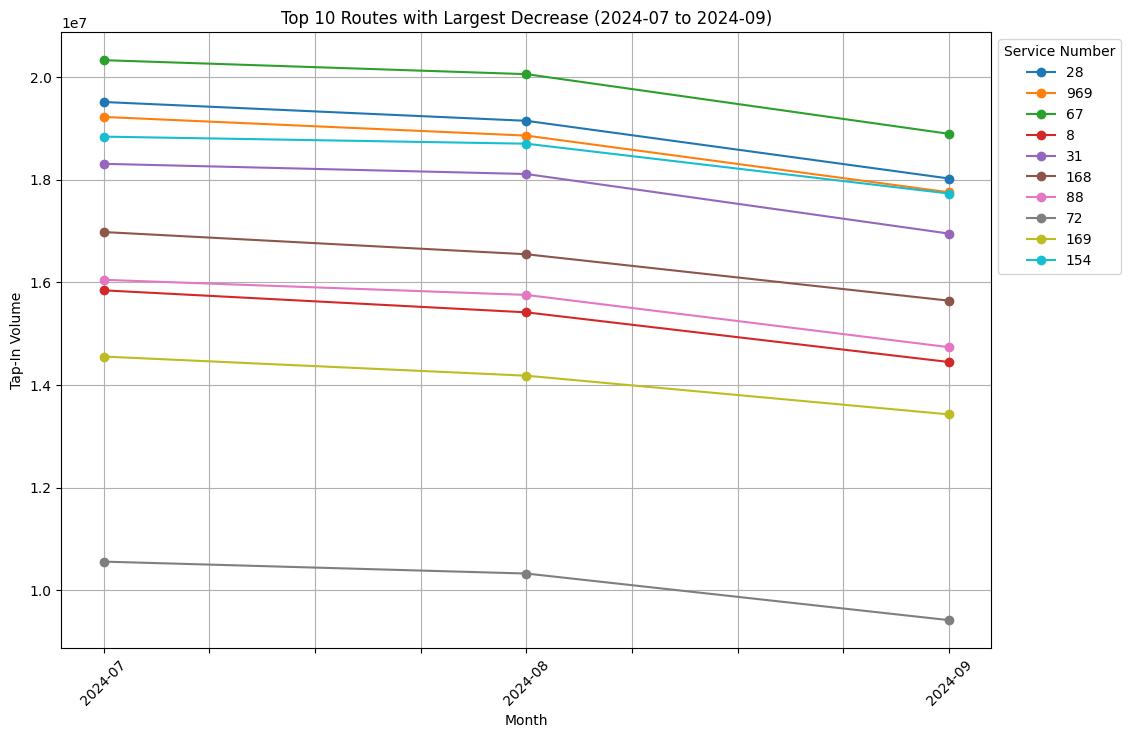

In [14]:
# Select the top 10 routes with the largest decrease
top_10_decreasing_routes = decreasing_routes_df_sorted.head(10)

# Extract the tap-in data for the selected routes using .loc
tap_in = tap_in_pivot.loc[top_10_decreasing_routes['ServiceNo'], ['2024-07', '2024-08', '2024-09']]

# Reset index to make 'ServiceNo' a column
tap_in.reset_index(inplace=True)

# Plot the line graph
plt.figure(figsize=(12, 8))

# Plotting directly without iterating
tap_in.set_index('ServiceNo').T.plot(marker='o', ax=plt.gca())

plt.title('Top 10 Routes with Largest Decrease (2024-07 to 2024-09)')
plt.xlabel('Month')
plt.ylabel('Tap-In Volume')
plt.xticks(rotation=45)
plt.legend(title='Service Number', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid()
plt.show()

### 1b. Normalise Passenger Volumes of Bus Routes by Total Number of Bus Stops

In [37]:
# Group by 'bus_service_no' and count the total number of stops it serves 'stop_sequence' for each bus service
route_stop_count = bus_routes_df.groupby('ServiceNo')['StopSequence'].count().reset_index()

# Rename the columns for clarity
route_stop_count.columns = ['ServiceNo', 'TotalStops']

In [16]:
# Normalise the dataset
normalised_bus_services_df = pd.merge(decreasing_routes_df, route_stop_count, 
                                   on = "ServiceNo", how = "left")
normalised_bus_services_df['Normalised'] = normalised_bus_services_df['Decrease'] / normalised_bus_services_df['TotalStops']

# Sort the DataFrame by 'Normalised' in descending order
decreasing_normalised_bus_services_df_sorted = normalised_bus_services_df.sort_values(by='Normalised', ascending=False)
decreasing_normalised_bus_services_df_sorted.to_csv('../datasets/pv_eda/routes_w_normalised_pv.csv', index=False)

In [66]:
decreasing_normalised_bus_services_df_sorted.head()

,ServiceNo,2024-07,2024-08,2024-09,Decreasing,Decrease,TotalStops,Normalised
381,902,3582681.0,3460522.0,3278218.0,True,304463.0,2,152231.500000
301,72B,890630.0,829679.0,643519.0,True,247111.0,5,49422.200000
343,856A,4667806.0,4545428.0,4344543.0,True,323263.0,7,46180.428571
379,901,7678939.0,7463463.0,7099732.0,True,579207.0,15,38613.800000
383,903M,7486396.0,7271234.0,6923205.0,True,563191.0,15,37546.066667


### 2a. Trend of Passenger Volumes by Bus Stops
- Assumption: Passenger Volumes represented by Total Number of Tap Ins and Tap Outs

In [38]:
# Create a new column 'TOTAL_TAP_VOLUME' summing tap-in and tap-out volumes
bus_stop_pv_jul['TOTAL_TAP_VOLUME'] = bus_stop_pv_jul['TOTAL_TAP_IN_VOLUME'] + bus_stop_pv_jul['TOTAL_TAP_OUT_VOLUME']
bus_stop_pv_aug['TOTAL_TAP_VOLUME'] = bus_stop_pv_aug['TOTAL_TAP_IN_VOLUME'] + bus_stop_pv_aug['TOTAL_TAP_OUT_VOLUME']
bus_stop_pv_sep['TOTAL_TAP_VOLUME'] = bus_stop_pv_sep['TOTAL_TAP_IN_VOLUME'] + bus_stop_pv_sep['TOTAL_TAP_OUT_VOLUME']

# Group by PT_CODE and YEAR_MONTH to get total taps for each bus stop per month
monthly_tap_jul = bus_stop_pv_jul.groupby(['PT_CODE', 'YEAR_MONTH'])[['TOTAL_TAP_VOLUME']].sum().reset_index()
monthly_tap_aug = bus_stop_pv_aug.groupby(['PT_CODE', 'YEAR_MONTH'])[['TOTAL_TAP_VOLUME']].sum().reset_index()
monthly_tap_sep = bus_stop_pv_sep.groupby(['PT_CODE', 'YEAR_MONTH'])[['TOTAL_TAP_VOLUME']].sum().reset_index()

In [18]:
# Concatenate all three months' data
all_months_taps = pd.concat([monthly_tap_jul, 
                             monthly_tap_aug,
                             monthly_tap_sep])

# Reset index after concatenation
all_months_taps.reset_index(drop=True, inplace=True)

In [19]:
# Ensure 'PT_CODE' and 'BusStopCode' are of the same data type
all_months_taps['PT_CODE'] = all_months_taps['PT_CODE'].astype(str)

# Pivot the data to have 'ServiceNo' as rows and 'YEAR_MONTH' as columns
tap_bus_stop_pivot = all_months_taps.pivot(index='PT_CODE', columns='YEAR_MONTH', values='TOTAL_TAP_VOLUME')

# Preview the pivot table
tap_bus_stop_pivot.head()

# Assuming tap_in_pivot already has the data for '2024-07', '2024-08', and '2024-09'
tap_bus_stop_pivot['Decreasing'] = (tap_bus_stop_pivot['2024-07'] > tap_bus_stop_pivot['2024-08']) & (tap_bus_stop_pivot['2024-08'] > tap_bus_stop_pivot['2024-09'])

# Create a DataFrame for routes with decreasing tap-ins
taps_bus_stop_df = tap_bus_stop_pivot[tap_bus_stop_pivot['Decreasing']].reset_index()
taps_bus_stop_df.rename(columns={'YEAR_MONTH': 'Index'}, inplace=True)

# Ensure that 'bus_routes_stops_cleaned' has unique 'BusStopCode'
bus_routes_stops_cleaned = bus_routes_stops.drop_duplicates(subset=['BusStopCode'])

# Merge to get the name and description for both the ORIGIN and DESTINATION in July
decreasing_bus_stops_df = pd.merge(
    taps_bus_stop_df, 
    bus_routes_stops_cleaned[['BusStopCode', 'RoadName', 'Description']],
    left_on='PT_CODE', 
    right_on='BusStopCode', 
    how='left'
).drop(columns=['BusStopCode'])

In [20]:
# Calculate the decrease from '2024-07' to '2024-09'
decreasing_bus_stops_df['Decrease'] = decreasing_bus_stops_df['2024-07'] - decreasing_bus_stops_df['2024-09']

# Sort the DataFrame by 'Decrease' in descending order
decreasing_bus_stops_df_sorted = decreasing_bus_stops_df.sort_values(by='Decrease', ascending=False)
decreasing_bus_stops_df_sorted.to_csv('../datasets/pv_eda/bus_stops_w_decreasing_pv.csv', index=False)

### 2b. Normalise Passenger Volumes of Bus Stops by Unique Number of Bus Services

In [21]:
# Group by 'bus_stop_code' and count the unique 'bus_service' for each stop
bus_service_count = bus_routes_df.groupby('BusStopCode')['ServiceNo'].nunique().reset_index()

# Rename the columns for clarity
bus_service_count.columns = ['BusStopCode', 'TotalBusService']

In [22]:
# Normalise the dataset
normalised_bus_stops_df = pd.merge(decreasing_bus_stops_df, bus_service_count, 
                                   left_on = "PT_CODE", right_on = "BusStopCode",
                                   how = "left").drop(columns=['BusStopCode'])
normalised_bus_stops_df['Normalised'] = normalised_bus_stops_df['Decrease'] / normalised_bus_stops_df['TotalBusService']

# Sort the DataFrame by 'Normalised' in descending order
decreasing_normalised_bus_stops_df_sorted = normalised_bus_stops_df.sort_values(by='Normalised', ascending=False)
decreasing_normalised_bus_stops_df_sorted.to_csv('../datasets/pv_eda/bus_stops_w_normalised_pv.csv', index=False)

### 3. Average (Mean and Median) Monthly Bus Servicing the Same Origin and Destination Routes

In [23]:
# Convert both 'ORIGIN_PT_CODE' and 'DESTINATION_PT_CODE' columns to string for July
bus_od_jul[['ORIGIN_PT_CODE', 'DESTINATION_PT_CODE']] = bus_od_jul[['ORIGIN_PT_CODE', 'DESTINATION_PT_CODE']].astype(str)
bus_od_aug[['ORIGIN_PT_CODE', 'DESTINATION_PT_CODE']] = bus_od_aug[['ORIGIN_PT_CODE', 'DESTINATION_PT_CODE']].astype(str)
bus_od_sep[['ORIGIN_PT_CODE', 'DESTINATION_PT_CODE']] = bus_od_sep[['ORIGIN_PT_CODE', 'DESTINATION_PT_CODE']].astype(str)

# Group by 'YEAR_MONTH', 'ORIGIN_PT_CODE' and 'DESTINATION_PT_CODE'
grouped_trips_jul = bus_od_jul.groupby(['YEAR_MONTH', 'ORIGIN_PT_CODE', 'DESTINATION_PT_CODE'])[['TOTAL_TRIPS']].sum().reset_index()
grouped_trips_aug = bus_od_aug.groupby(['YEAR_MONTH', 'ORIGIN_PT_CODE', 'DESTINATION_PT_CODE'])[['TOTAL_TRIPS']].sum().reset_index()
grouped_trips_sep = bus_od_sep.groupby(['YEAR_MONTH', 'ORIGIN_PT_CODE', 'DESTINATION_PT_CODE'])[['TOTAL_TRIPS']].sum().reset_index()

In [68]:
bus_od_jul.head()

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,ORIGIN_PT_CODE,DESTINATION_PT_CODE,TOTAL_TRIPS
0,2024-07,WEEKDAY,22,BUS,43499,43481,1
1,2024-07,WEEKENDS/HOLIDAY,23,BUS,22009,14109,1
2,2024-07,WEEKDAY,22,BUS,10099,3031,1
3,2024-07,WEEKENDS/HOLIDAY,16,BUS,7419,7031,33
4,2024-07,WEEKDAY,9,BUS,72079,60089,4


In [24]:
# Ensure that 'bus_routes_stops_cleaned' has unique 'BusStopCode'
bus_routes_stops_cleaned = bus_routes_stops.drop_duplicates(subset=['BusStopCode'])

# Merge to get the name and description for both the ORIGIN and DESTINATION in July
route_trips_jul = pd.merge(
    grouped_trips_jul, 
    bus_routes_stops_cleaned[['BusStopCode', 'Description']].rename(columns={'Description': 'ORIGIN_DESCRIPTION'}),
    left_on='ORIGIN_PT_CODE', 
    right_on='BusStopCode', 
    how='left'
).drop(columns=['BusStopCode'])

route_trips_jul = pd.merge(
    route_trips_jul, 
    bus_routes_stops_cleaned[['BusStopCode', 'Description']].rename(columns={'Description': 'DESTINATION_DESCRIPTION'}),
    left_on='DESTINATION_PT_CODE', 
    right_on='BusStopCode', 
    how='left'
).drop(columns=['BusStopCode'])

# Merge to get the name and description for both the ORIGIN and DESTINATION in July
route_trips_aug = pd.merge(
    grouped_trips_aug, 
    bus_routes_stops_cleaned[['BusStopCode', 'Description']].rename(columns={'Description': 'ORIGIN_DESCRIPTION'}),
    left_on='ORIGIN_PT_CODE', 
    right_on='BusStopCode', 
    how='left'
).drop(columns=['BusStopCode'])

route_trips_aug = pd.merge(
    route_trips_aug, 
    bus_routes_stops_cleaned[['BusStopCode', 'Description']].rename(columns={'Description': 'DESTINATION_DESCRIPTION'}),
    left_on='DESTINATION_PT_CODE', 
    right_on='BusStopCode', 
    how='left'
).drop(columns=['BusStopCode'])

# Merge to get the name and description for both the ORIGIN and DESTINATION in July
route_trips_sep = pd.merge(
    grouped_trips_sep, 
    bus_routes_stops_cleaned[['BusStopCode', 'Description']].rename(columns={'Description': 'ORIGIN_DESCRIPTION'}),
    left_on='ORIGIN_PT_CODE', 
    right_on='BusStopCode', 
    how='left'
).drop(columns=['BusStopCode'])

route_trips_sep = pd.merge(
    route_trips_sep, 
    bus_routes_stops_cleaned[['BusStopCode', 'Description']].rename(columns={'Description': 'DESTINATION_DESCRIPTION'}),
    left_on='DESTINATION_PT_CODE', 
    right_on='BusStopCode', 
    how='left'
).drop(columns=['BusStopCode'])

In [25]:
# Concatenate all three months' data
all_months_trips = pd.concat([route_trips_jul, 
                             route_trips_aug,
                             route_trips_sep])

# Reset index after concatenation
all_months_trips.reset_index(drop=True, inplace=True)

In [61]:
all_months_trips.head()

,YEAR_MONTH,ORIGIN_PT_CODE,DESTINATION_PT_CODE,TOTAL_TRIPS,ORIGIN_DESCRIPTION,DESTINATION_DESCRIPTION
0,2024-07,10009,10017,58,Bt Merah Int,Aft Hosp Dr
1,2024-07,10009,10049,129,Bt Merah Int,OPP KAMPONG BAHRU TER
2,2024-07,10009,10059,155,Bt Merah Int,Opp Blk 149
3,2024-07,10009,10069,133,Bt Merah Int,Opp Blk 140
4,2024-07,10009,10079,2134,Bt Merah Int,Blk 201


In [26]:
monthly_mean_total_trips = all_months_trips.groupby(['ORIGIN_PT_CODE', 
                                                'DESTINATION_PT_CODE', 
                                                'ORIGIN_DESCRIPTION', 
                                                'DESTINATION_DESCRIPTION'])[['TOTAL_TRIPS']].mean().reset_index()

# Sort the DataFrame by 'TOTAL_TRIPS' in descending order
mean_trips_sorted = monthly_mean_total_trips.sort_values(by='TOTAL_TRIPS', ascending=False)
mean_trips_sorted.to_csv('../datasets/pv_eda/mean_trips.csv', index=False)

In [27]:
monthly_median_total_trips = all_months_trips.groupby(['ORIGIN_PT_CODE', 
                                                'DESTINATION_PT_CODE', 
                                                'ORIGIN_DESCRIPTION', 
                                                'DESTINATION_DESCRIPTION'])[['TOTAL_TRIPS']].median().reset_index()

# Sort the DataFrame by 'TOTAL_TRIPS' in descending order
median_trips_sorted = monthly_median_total_trips.sort_values(by='TOTAL_TRIPS', ascending=False)
median_trips_sorted.to_csv('../datasets/pv_eda/median_trips.csv', index=False)

## Summary
1. Bus stops and services that saw a significant decrease are those that serve higher educational institutions (e.g. Polytechnics, ITEs) -- July to September coincide with term breaks
2. Top bus services based on their monthly number of trips are those that serve short distances 

## EDA of Bus Routes and Services along Interchanges and Stations

### 4. Total Number of Interchanges and Stations each Bus Service serves

In [74]:
filtered_bus_stops = bus_stops_df[bus_stops_df['Description'].str.contains(r'Int|Stn', case=False, na=False)]
filtered_bus_stops.head()

,BusStopCode,RoadName,Description,Latitude,Longitude
5,01059,Victoria St,Bugis Stn Exit B,1.300757,103.856110
7,01112,Victoria St,Opp Bugis Stn Exit C,1.300092,103.855200
8,01113,Victoria St,Bugis Stn Exit A,1.301173,103.856114
9,01119,Victoria St,Aft Bugis Stn Exit C,1.299604,103.855129
12,01139,Nth Bridge Rd,Bugis Stn/Parkview Sq,1.300331,103.857161


In [75]:
# Merge the filtered bus stops with the bus routes dataframe
merged_df = pd.merge(bus_routes_df, filtered_bus_stops, on='BusStopCode', how='inner')

# Group by the service number and count the bus stops
bus_service_stop_counts = merged_df.groupby('ServiceNo')['BusStopCode'].nunique().reset_index()

# Rename the columns for clarity
bus_service_stop_counts.columns = ['ServiceNo', 'CountOfStopsWithIntOrStn']

# Sort the DataFrame by 'CountOfStopsWithIntOrStn' in descending order
int_stn_bus_service_sorted = bus_service_stop_counts.sort_values(by='CountOfStopsWithIntOrStn', ascending=False)
int_stn_bus_service_sorted.to_csv('../datasets/pv_eda/int_stn_bus_service.csv', index=False)

### 5a. Trend of Passenger Volume at Interchanges and Stations

In [30]:
int_stn_pv_sorted = decreasing_bus_stops_df_sorted[decreasing_bus_stops_df_sorted['Description'].str.contains(r'Int|Stn', case=False, na=False)]
int_stn_pv_sorted.to_csv('../datasets/pv_eda/int_stn_pv.csv', index=False)

### 5b. Normalise Passenger Volume at Interchanges and Stations

In [31]:
int_stn_pv_normalise_sorted = decreasing_normalised_bus_stops_df_sorted[decreasing_normalised_bus_stops_df_sorted['Description'].str.contains(r'Int|Stn', case=False, na=False)]
int_stn_pv_normalise_sorted.to_csv('../datasets/pv_eda/int_stn_normalised_pv.csv', index=False)

In [32]:
# Set threshold as 3000 passenger volume
filtered_threshold = int_stn_pv_normalise_sorted[int_stn_pv_normalise_sorted['Normalised'] > 3000]
filtered_threshold = filtered_threshold['PT_CODE']

# Merge the filtered bus stops with the bus routes dataframe
merged_threshold_df = pd.merge(bus_routes_df, filtered_threshold, 
                               left_on='BusStopCode', right_on='PT_CODE', 
                               how='inner').drop(columns=['PT_CODE'])

# Group by the service number and count the bus stops
threshold_stop_counts = merged_threshold_df.groupby('ServiceNo')['BusStopCode'].nunique().reset_index()

# Rename the columns for clarity
threshold_stop_counts.columns = ['ServiceNo', 'IntStnLargeDecrease']

# Sort the DataFrame by 'IntStnLargeDecrease' in descending order
threshold_bus_service_sorted = threshold_stop_counts.sort_values(by='IntStnLargeDecrease', ascending=False)
threshold_bus_service_sorted.to_csv('../datasets/pv_eda/threshold3000_int_stn_bus.csv', index=False)

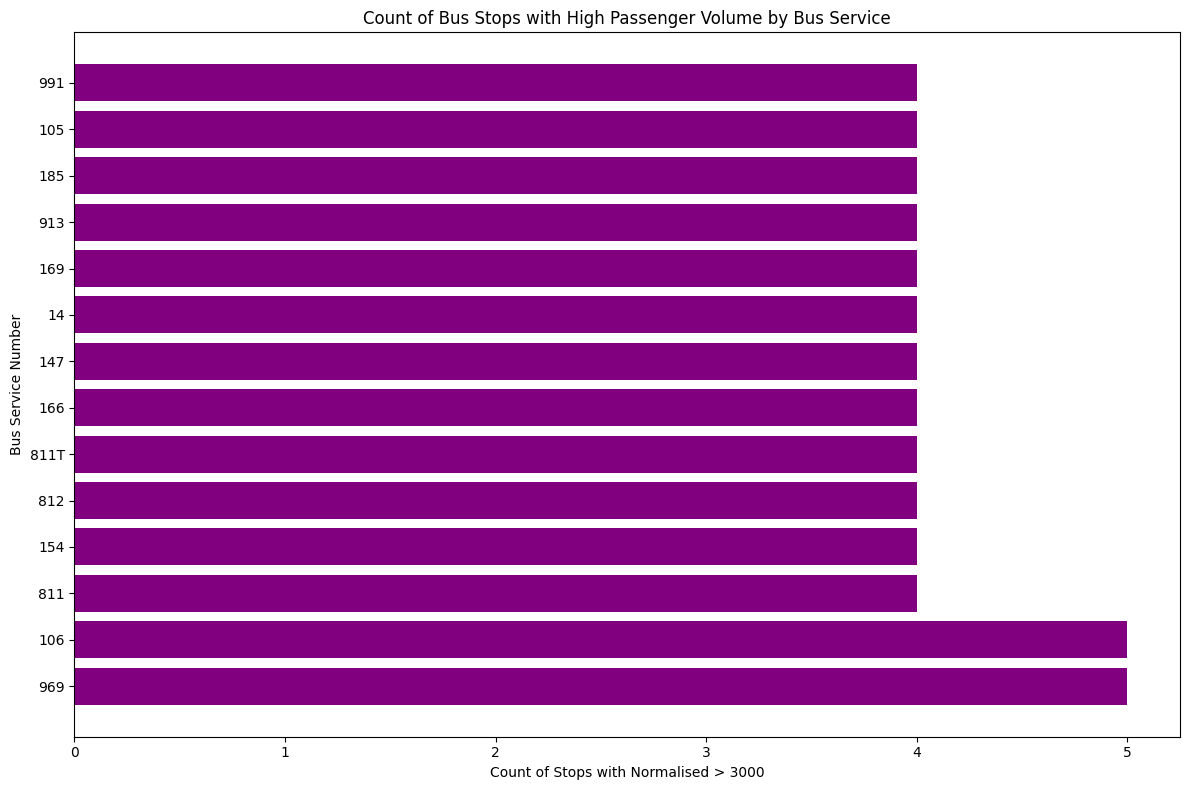

In [33]:
# Select services that serve at least 3 stations or interchanges with at least a decrease in 3000 passengers
more_than_3_stops = threshold_bus_service_sorted[threshold_bus_service_sorted['IntStnLargeDecrease'] > 3]

# Plot graph
plt.figure(figsize=(12, 8))
plt.barh(more_than_3_stops['ServiceNo'], 
         more_than_3_stops['IntStnLargeDecrease'], 
         color='purple')
plt.xlabel('Count of Stops with Normalised > 3000')
plt.ylabel('Bus Service Number')
plt.title('Count of Bus Stops with High Passenger Volume by Bus Service')
plt.tight_layout()
plt.show()

In [34]:
# Set threshold as 1000 passenger volume
filtered_threshold = int_stn_pv_normalise_sorted[int_stn_pv_normalise_sorted['Normalised'] > 1000]
filtered_threshold = filtered_threshold['PT_CODE']

# Merge the filtered bus stops with the bus routes dataframe
merged_threshold_df = pd.merge(bus_routes_df, filtered_threshold, 
                               left_on='BusStopCode', right_on='PT_CODE', 
                               how='inner').drop(columns=['PT_CODE'])

# Group by the service number and count the bus stops
threshold_stop_counts = merged_threshold_df.groupby('ServiceNo')['BusStopCode'].nunique().reset_index()

# Rename the columns for clarity
threshold_stop_counts.columns = ['ServiceNo', 'IntStnLargeDecrease']

# Sort the DataFrame by 'IntStnLargeDecrease' in descending order
threshold_bus_service_sorted = threshold_stop_counts.sort_values(by='IntStnLargeDecrease', ascending=False)
threshold_bus_service_sorted.to_csv('../datasets/pv_eda/threshold1000_int_stn_bus.csv', index=False)

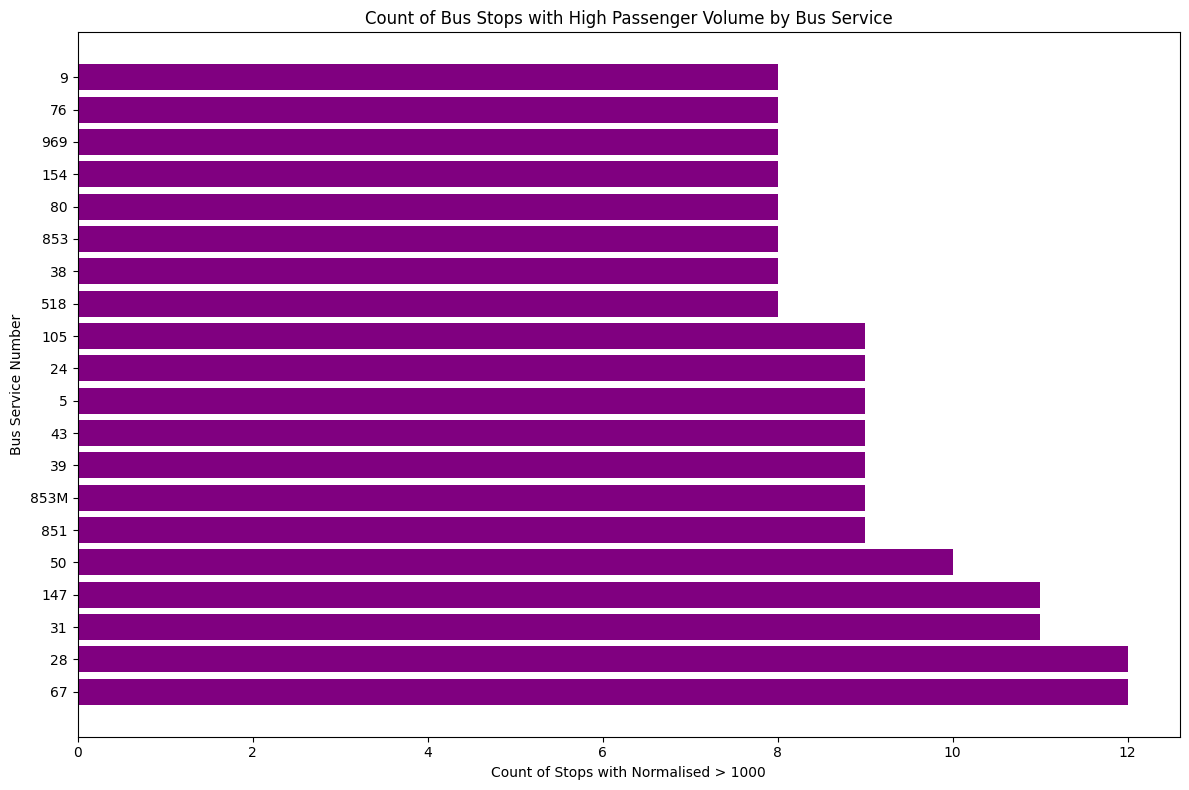

In [35]:
# Select services that serve at least 8 stations or interchanges with at least a decrease in 1000 passengers
more_than_8_stops = threshold_bus_service_sorted[threshold_bus_service_sorted['IntStnLargeDecrease'] > 7]

# Plot graph
plt.figure(figsize=(12, 8))
plt.barh(more_than_8_stops['ServiceNo'], 
         more_than_8_stops['IntStnLargeDecrease'], 
         color='purple')
plt.xlabel('Count of Stops with Normalised > 1000')
plt.ylabel('Bus Service Number')
plt.title('Count of Bus Stops with High Passenger Volume by Bus Service')
plt.tight_layout()
plt.show()